In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn


In [ ]:
pip install transformers

     |████████████████████████████████| 4.0 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 54.6 MB/s 
     |████████████████████████████████| 6.5 MB 50.9 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 45.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
depressed_df=pd.read_table("/content/drive/MyDrive/Colab Notebooks/AIT/NLP/FinalProject/Depression Detection/depression_posts.txt",header=None, names = ['Tweet'])
controlled_df = pd.read_table("/content/drive/MyDrive/Colab Notebooks/AIT/NLP/FinalProject/Depression Detection/control_posts.txt",header=None, names = ['Tweet'])

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
depressed_df.head()

,Tweet
0,"I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now"
1,I'm the luckiest girl alive. Brou makes sure I'm treated like a queen 😍😍
2,This was two years ago 😭😭😭 I'm sad. That night was unforgettable https://t.co/TzfTcCdgTo
3,Chyna was dead for a couple days but still damn
4,"I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day."


In [ ]:
controlled_df.head()

,Tweet
0,It always surprises me to remember the last thing I googled before bed.... can't actually remember why... 😗… https://t.co/Iib0PKQOZm
1,"@Spiceyben @irwinjc I was about to get angry with you Ben but then I remembered , TODAY IS MY FRIDAY TOO !! 😮😲😀😆 https://t.co/t1bU4x9OHO"
2,Hollywood’s Protests Might Seem Ineffective —But They’re Actually Getting to Trump https://t.co/R318A9odS8 via @vulture
3,"@CustardCousin what a robbing bastard ! Well I guess all that Botox and shite clothes don't come cheap, eh @robbiewilliams !?"
4,There are coming baack !! And for even longer this time ! #XFiles https://t.co/mBRLUaxZLk


In [ ]:
print(len(depressed_df))
print()
print(len(controlled_df))

393157

3016144


In [ ]:
depressed_df['Status'] = 'depressed'
controlled_df['Status'] = 'controlled'

In [ ]:
depressed_df.head()

,Tweet,Status
0,"I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now",depressed
1,I'm the luckiest girl alive. Brou makes sure I'm treated like a queen 😍😍,depressed
2,This was two years ago 😭😭😭 I'm sad. That night was unforgettable https://t.co/TzfTcCdgTo,depressed
3,Chyna was dead for a couple days but still damn,depressed
4,"I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.",depressed


In [ ]:
controlled_df.head()

,Tweet,Status
0,It always surprises me to remember the last thing I googled before bed.... can't actually remember why... 😗… https://t.co/Iib0PKQOZm,controlled
1,"@Spiceyben @irwinjc I was about to get angry with you Ben but then I remembered , TODAY IS MY FRIDAY TOO !! 😮😲😀😆 https://t.co/t1bU4x9OHO",controlled
2,Hollywood’s Protests Might Seem Ineffective —But They’re Actually Getting to Trump https://t.co/R318A9odS8 via @vulture,controlled
3,"@CustardCousin what a robbing bastard ! Well I guess all that Botox and shite clothes don't come cheap, eh @robbiewilliams !?",controlled
4,There are coming baack !! And for even longer this time ! #XFiles https://t.co/mBRLUaxZLk,controlled


In [ ]:
np.random.seed(10)
random_row = np.random.randint(low = 0, high = len(depressed_df), size = 10 )


In [ ]:
sample_df = pd.concat((depressed_df.iloc[random_row] , controlled_df.iloc[random_row]))

In [ ]:
sample_df

,Tweet,Status
345353,"@Sagemaster15 Fine... get yourself comfortable, I'll make you some tea.",depressed
236669,I #vote for @AttitudesInRev to #UpgradeYourWorldUSA,depressed
356879,Lil Bub is just adorable. Kittens are just furry little bundles of love. https://t.co/fTCNwcL5Bu,depressed
93553,good monday morning #toronto . lots to get done and a blog to update!,depressed
105595,"How To Resolve Family Tension…?: Okay, I’m sure I’ll get some sort of scolding for putting something personal li... http://bit.ly/g1Upno",depressed
9372,"#oomf and u know who u are is in straight slack mode tonight,lmbo",depressed
299741,"I just really hate people and you, okay? Bahahahahahahaha. WHAT.THE.FUCK.EVER.",depressed
280048,"RT taracampbell7: RT deannabennett13: We all just need to love, be loved and belong 💕 #BellLetsTalk http://t.co/IajbOmzfnA",depressed
108445,Photoset: http://t.co/PDJA3xU4A0,depressed
278385,Working on a video for a poem I wrote and have been given permission from a very big YouTuber to use a clip from one of his videos in mine 😆,depressed


## Preprocessing

In [ ]:
eng_word = [ 'to' ,'for', 'a' ,'the' , 'i', 'we', 'you' , 'me']

In [ ]:
for word in eng_word:
    print(sample_df["Tweet"].iloc[13])
    print(word in sample_df["Tweet"].iloc[13])

Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
False
Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
False
Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
True
Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
False
Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
True
Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
False
Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
False
Elektrik Kesintisi Var İşlerinizi Buna Göre Ayarlayın https://t.co/jxyI79fIOb
False


In [ ]:
sample_df["Tweet"].iloc[11]

'We gettin there...'

### Preprocessing - English Check

In [ ]:
[word in sample_df["Tweet"].iloc[3].lower().split() for word in eng_word]

[True, False, True, False, False, False, False, False]

In [ ]:
type(sample_df["Tweet"].iloc[0])

str

In [ ]:
def check_eng(sentence):
    eng_word = [ 'the', 'be', 'to', 'of', 'an', 'a', 'in', 'that', 'have', 'i', 
                'you', 'we', 'they', 'she', 'he', 'it', 'is', 'am', 'are', 'do',
                'does', 'yes', 'no','not', 'has', 'and', 'so', 'for', 'to', 'on', 'of',
                'today', 'who', 'what', 'when', 'where', 'why', 'how', 'get', 'got'
                , 'my', 'that', 'your', 'mine', 'oh', 'wow', 'too', 'like', 'well', 'sad', 'happy',
                'by', 'bye', 'off']
    score = 0
    for word in eng_word:
        if type(sentence) == str:
            if word in sentence.lower().split():
                score += 1
            else:
                pass
        else:
            score = 0

    return score


In [ ]:
result = np.vectorize(check_eng)(sample_df["Tweet"])
np.where(result == 0)

(array([ 8, 13, 14, 16, 19]),)

In [ ]:
result

array([ 2,  4,  4,  5,  7,  5,  2,  5,  0, 12,  3,  1,  2,  0,  0,  3,  0,
        2,  1,  0])

In [ ]:
check_eng('I am very happy cause it is raining')

5

In [ ]:
depressed_df['eng_check'] = np.vectorize(check_eng)(depressed_df["Tweet"])
controlled_df['eng_check'] = np.vectorize(check_eng)(controlled_df["Tweet"])

KeyboardInterrupt: ignored

In [ ]:
depressed_df[depressed_df['eng_check'] == 0].iloc[30:60]

,Tweet,Status,eng_check,clean_Tweet
130,Rih 😍 https://t.co/DWB7oEjRhl,depressed,0,Rih 😍
132,@yunggsheezzy you're welcome 💘,depressed,0,you're welcome 💘
141,Best sister ever https://t.co/bm4BoT2tZZ,depressed,0,Best sister ever
142,National security 😂😂😂😂😂,depressed,0,National security 😂😂😂😂😂
152,Lmao 😂😂😂 https://t.co/gH2IgxZTrb,depressed,0,Lmao 😂😂😂
154,@blvckprince where?,depressed,0,where?
155,Man 😂😂 https://t.co/M3gffBeZB6,depressed,0,Man 😂😂
164,BRUH https://t.co/E2fTgeo78J,depressed,0,BRUH
167,@Tiaaa_booo really 😭😍😍😍 stop playin,depressed,0,really 😭😍😍😍 stop playin
171,I'm im loooovveee with Rihanna's album,depressed,0,I'm im loooovveee with Rihanna's album


In [ ]:
depressed_df[depressed_df['eng_check'] == 0]

,Tweet,Status,eng_check
9,@astrog1rll 😂😂😂😂😂😂😂😂😂,depressed,0
15,Happy birthday big bro @SLAP_E! Enjoy your day ☺️🎉🎈,depressed,0
19,HAHAHAHA yaaaas honey https://t.co/L06WGCVc3Q,depressed,0
20,@muneesha_ IGNORANT ass troll,depressed,0
31,😍😍😍😍 https://t.co/Ok4LFFZDfT,depressed,0
...,...,...,...
393124,YES!! #TheSims4 http://t.co/UqQNPLq1iW,depressed,0
393129,Dippin dots #Minnesotastatefair http://t.co/zNWD7Q1JUm,depressed,0
393130,#Minnesotastatefair http://t.co/JVjeu1UhAt,depressed,0
393131,#Minnesotastatefair http://t.co/mibxuLn24V,depressed,0


In [ ]:
depressed_df

,Tweet,Status,eng_check,clean_Tweet
0,"I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now",depressed,9,"I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now"
1,I'm the luckiest girl alive. Brou makes sure I'm treated like a queen 😍😍,depressed,3,I'm the luckiest girl alive. Brou makes sure I'm treated like a queen 😍😍
2,This was two years ago 😭😭😭 I'm sad. That night was unforgettable https://t.co/TzfTcCdgTo,depressed,2,This was two years ago 😭😭😭 I'm sad. That night was unforgettable
3,Chyna was dead for a couple days but still damn,depressed,2,Chyna was dead for a couple days but still damn
4,"I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.",depressed,9,"I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day."
...,...,...,...,...
393152,If Rae Earl makes as many incredible friends at Bristol as I did at Cambridge then she'll be set for life #goodbyeMMFD,depressed,3,If Rae Earl makes as many incredible friends at Bristol as I did at Cambridge then she'll be set for life #goodbyeMMFD
393153,"To everyone who loves me, everything I would ever want to say to you was just said by @sharonrooney as Rae Earl in #MyMadFatDiary",depressed,7,"To everyone who loves me, everything I would ever want to say to you was just said by as Rae Earl in #MyMadFatDiary"
393154,"10 years since falling in love with @gemma_hayes' music, her songs still give me all the feels &lt;3 https://t.co/JSp0o7ydIL",depressed,2,"10 years since falling in love with music, her songs still give me all the feels &lt;3"
393155,Unesco impotence takes shine off world heritage status http://t.co/J3WOWmzOQ4 by @ollywainwright,depressed,2,Unesco impotence takes shine off world heritage status by


### Preprocessing - HTTP removal

In [ ]:
import re
import string

In [ ]:
depressed_df['Tweet'].iloc[2]

"This was two years ago 😭😭😭 I'm sad. That night was unforgettable https://t.co/TzfTcCdgTo"

In [ ]:
re.sub('http://\S+|https://\S+', '', depressed_df['Tweet'].iloc[2])

"This was two years ago 😭😭😭 I'm sad. That night was unforgettable "

In [ ]:
re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", 'sdfsf http://google @Poon #omg something else')

'sdfsf   #omg something else'

In [ ]:
def remove_http(sentence):
    if type(sentence) == str:
        clean_sentence = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", '', sentence)
        clean_sentence = re.sub('@[A-Za-z0-9]+', '', clean_sentence)

    else:
        clean_sentence = sentence

    return clean_sentence

In [ ]:
print(depressed_df['Tweet'].iloc[2])
print(remove_http(depressed_df['Tweet'].iloc[2]))

This was two years ago 😭😭😭 I'm sad. That night was unforgettable https://t.co/TzfTcCdgTo
This was two years ago 😭😭😭 I'm sad. That night was unforgettable 


In [ ]:
print(depressed_df['Tweet'].iloc[20])
print(remove_http(depressed_df['Tweet'].iloc[20]))

@muneesha_ IGNORANT ass troll
 IGNORANT ass troll


In [ ]:
print(depressed_df['Tweet'].iloc[5])
print(remove_http(depressed_df['Tweet'].iloc[5]))

So disrespectful RT"@thedailybeast: Taylor Swift Is the New Prince https://t.co/m13T3TMkzg https://t.co/Dm6GhOOP90"
So disrespectful RT" Taylor Swift Is the New Prince  


In [ ]:
depressed_df['clean_Tweet'] = np.vectorize(remove_http)(depressed_df["Tweet"])
controlled_df['clean_Tweet'] = np.vectorize(remove_http)(controlled_df["Tweet"])

In [ ]:
depressed_df[ depressed_df['eng_check'] == 0]

,Tweet,Status,eng_check,clean_Tweet
9,@astrog1rll 😂😂😂😂😂😂😂😂😂,depressed,0,😂😂😂😂😂😂😂😂😂
19,HAHAHAHA yaaaas honey https://t.co/L06WGCVc3Q,depressed,0,HAHAHAHA yaaaas honey
20,@muneesha_ IGNORANT ass troll,depressed,0,IGNORANT ass troll
31,😍😍😍😍 https://t.co/Ok4LFFZDfT,depressed,0,😍😍😍😍
34,https://t.co/rP9jASWyFO,depressed,0,
...,...,...,...,...
393110,About damn time Vikings #AdrianPeterson #shouldhavebeenbanneddaysago,depressed,0,About damn time Vikings #AdrianPeterson #shouldhavebeenbanneddaysago
393124,YES!! #TheSims4 http://t.co/UqQNPLq1iW,depressed,0,YES!! #TheSims4
393129,Dippin dots #Minnesotastatefair http://t.co/zNWD7Q1JUm,depressed,0,Dippin dots #Minnesotastatefair
393130,#Minnesotastatefair http://t.co/JVjeu1UhAt,depressed,0,#Minnesotastatefair


In [ ]:
depressed_df.to_csv('clean_depressed.csv') 
files.download('clean_depressed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
controlled_df.to_csv('clean_controlled_df.csv') 
files.download('clean_controlled_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
controlled_df[ controlled_df["eng_check"] == 0]

,Tweet,Status,eng_check,clean_Tweet
9,@KayBurley subtle ! 😉👍🏻,controlled,0,subtle ! 😉👍🏻
15,@NYDailyNews @gregstevens WTF!!? https://t.co/2lVsl8vIv6,controlled,0,WTF!!?
38,@Jim936 @mrpwhitley SEXY DADDY!!!! 💪🏻👨🏻💃🏾💃🏾💃🏿,controlled,0,SEXY DADDY!!!! 💪🏻👨🏻💃🏾💃🏾💃🏿
41,@AlwaystrumpOrg @deerhunter @realDonaldTrump #liar https://t.co/y0eMUT2M8i,controlled,0,#liar
43,Hello daddy!! #PS4share https://t.co/zL0fO8crtp,controlled,0,Hello daddy!! #PS4share
...,...,...,...,...
3016102,Good luck~!,controlled,0,Good luck~!
3016123,All good things must end.,controlled,0,All good things must end.
3016129,That...could've felt better...,controlled,0,That...could've felt better...
3016131,Ahh...finally... Sweet...death... Finally...the pain... F-finally...it ends...,controlled,0,Ahh...finally... Sweet...death... Finally...the pain... F-finally...it ends...


In [ ]:
controlled_df

,Tweet,Status,eng_check,clean_Tweet
0,It always surprises me to remember the last thing I googled before bed.... can't actually remember why... 😗… https://t.co/Iib0PKQOZm,controlled,5,It always surprises me to remember the last thing I googled before bed.... can't actually remember why... 😗…
1,"@Spiceyben @irwinjc I was about to get angry with you Ben but then I remembered , TODAY IS MY FRIDAY TOO !! 😮😲😀😆 https://t.co/t1bU4x9OHO",controlled,9,"I was about to get angry with you Ben but then I remembered , TODAY IS MY FRIDAY TOO !! 😮😲😀😆"
2,Hollywood’s Protests Might Seem Ineffective —But They’re Actually Getting to Trump https://t.co/R318A9odS8 via @vulture,controlled,2,Hollywood’s Protests Might Seem Ineffective —But They’re Actually Getting to Trump via
3,"@CustardCousin what a robbing bastard ! Well I guess all that Botox and shite clothes don't come cheap, eh @robbiewilliams !?",controlled,7,"what a robbing bastard ! Well I guess all that Botox and shite clothes don't come cheap, eh !?"
4,There are coming baack !! And for even longer this time ! #XFiles https://t.co/mBRLUaxZLk,controlled,3,There are coming baack !! And for even longer this time ! #XFiles
...,...,...,...,...
3016139,"From now on, I live only for you. And as you may have noticed, I'm the fiercely loyal type.",controlled,6,"From now on, I live only for you. And as you may have noticed, I'm the fiercely loyal type."
3016140,I feel more supple already.,controlled,1,I feel more supple already.
3016141,You want to sell this? Careful. I might get pouty.,controlled,5,You want to sell this? Careful. I might get pouty.
3016142,"Happy birthday, my dear sweet Avatar. Hee hee!",controlled,2,"Happy birthday, my dear sweet Avatar. Hee hee!"


https://lengyi.medium.com/twitterio-1-thai-text-cleansing-regular-expression-python-abe985b773b4

https://towardsdatascience.com/all-you-need-to-know-about-text-preprocessing-for-nlp-and-machine-learning-bc1c5765ff67

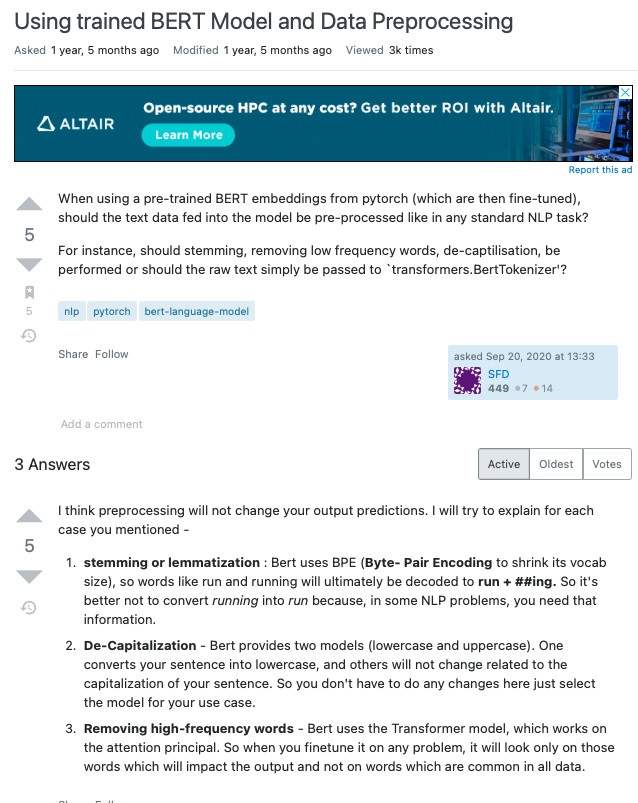

## Read Dataset

In [ ]:
clean_control = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIT/NLP/FinalProject/clean_dataset/superclean_controlled.csv")
clean_depress = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIT/NLP/FinalProject/clean_dataset/superclean_depressed.csv")


In [ ]:
clean_control = clean_control.iloc[: , 1 :]
clean_depress = clean_depress.iloc[: , 1 :]

In [ ]:
clean_control.head()

,clean_Tweet,Status,depress_check
0,what a robbing bastard ! Well I guess all tha...,controlled,1
1,hahha thought I did !? Yeah celery is gonna ...,controlled,1
2,"😘😘😘 don't thank me , thank the TV producer w...",controlled,1
3,she's 75 for fuck sake. Show her some respect.,controlled,1
4,'100% snog marry hotter than my daughter ' or...,controlled,1


In [ ]:
clean_control['depress_check'].value_counts()

1    320002
2     57626
3      9765
4      1607
5       249
6        45
7         5
9         1
8         1
Name: depress_check, dtype: int64

In [ ]:
clean_control = clean_control[ clean_control["eng_check"] > 0][ ["clean_Tweet", "Status"]].reset_index(drop = True)
clean_depress = clean_depress[ clean_depress["eng_check"] > 0][ ["clean_Tweet", "Status"]].reset_index(drop = True)

KeyError: ignored

In [ ]:
clean_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389301 entries, 0 to 389300
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   clean_Tweet    389301 non-null  object
 1   Status         389301 non-null  object
 2   depress_check  389301 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 8.9+ MB


In [ ]:
clean_depress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80339 entries, 0 to 80338
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_Tweet    80339 non-null  object
 1   Status         80339 non-null  object
 2   depress_check  80339 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
main_df = pd.concat((clean_control, clean_depress  )).reset_index(drop = True)
main_df

,clean_Tweet,Status,depress_check
0,what a robbing bastard ! Well I guess all tha...,controlled,1
1,hahha thought I did !? Yeah celery is gonna ...,controlled,1
2,"😘😘😘 don't thank me , thank the TV producer w...",controlled,1
3,she's 75 for fuck sake. Show her some respect.,controlled,1
4,'100% snog marry hotter than my daughter ' or...,controlled,1
...,...,...,...
469635,So excited going to the Minnesota state fair t...,depressed,1
469636,this makes me want to puke I wish I hadn't wa...,depressed,1
469637,that's awful - Oxbridge would've been lucky t...,depressed,1
469638,"As I hated economic history at University, I d...",depressed,1


### Sample Dataframe

In [ ]:
np.random.seed(20)
random_row_10 = np.random.randint(low = 0, high = len(clean_depress), size = 10 )
sample_10 = pd.concat((clean_control.iloc[random_row_10], clean_depress.iloc[random_row_10]   )).reset_index(drop = True)

random_row_100 = np.random.randint(low = 0, high = len(clean_depress), size = 100 )
sample_100 = pd.concat((clean_control.iloc[random_row_100], clean_depress.iloc[random_row_100]   )).reset_index(drop = True)


random_row_1000 = np.random.randint(low = 0, high = len(clean_depress), size = 1000 )
sample_1000 = pd.concat((clean_control.iloc[random_row_1000], clean_depress.iloc[random_row_1000]   )).reset_index(drop = True)


In [ ]:
sample_10

,clean_Tweet,Status,depress_check
0,IM BOTH CREEPED OUT AND HAVING THE TIME OF MY...,controlled,1
1,Christmas next week &amp; I ain't gotta buy no...,controlled,1
2,I never want to go to the dentist again There ...,controlled,3
3,Kaz is a big old twitter bully. She hurt som...,controlled,1
4,my Mum regularly has to have stays in hospit...,controlled,2
5,Henry is another one that I have a problem w...,controlled,1
6,I miss talking about jjba,controlled,1
7,"A lot of people like them, so ok, I just don't...",controlled,1
8,Será que alguma vez o Jorge Jesus mandou a dic...,controlled,1
9,Read what he has to say abt SRK if u want i w...,controlled,1


https://analyticsindiamag.com/a-guide-to-text-preprocessing-using-bert/

# Understanding Tokenizer

In [ ]:
pip install transformers

     |████████████████████████████████| 3.8 MB 4.9 MB/s 
     |████████████████████████████████| 596 kB 49.5 MB/s 
     |████████████████████████████████| 6.5 MB 37.3 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 895 kB 50.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenizer.tokenize('stressful')

['stress', '##ful']

In [ ]:
sample_10.iloc[0, 0]

'  I hope his socks get wet'

In [ ]:
print(sample_10.iloc[0, 0])
print(type(sample_10.iloc[0, 0]))

  I hope his socks get wet
<class 'str'>


In [ ]:
example = sample_10.iloc[0, 0]
bert_input = tokenizer(example,padding='max_length', max_length = 512, 
                       truncation=True, return_tensors="pt")

In [ ]:
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
tokenizer.decode(bert_input.input_ids[0])

'[CLS] I hope his socks get wet [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [ ]:
bert_input['token_type_ids']

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0

In [ ]:
bert_input['input_ids']

tensor([[  101,   146,  2810,  1117, 16601,  1243,  4375,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

# Dataset Class


In [ ]:
import torch

In [ ]:
labels = {'controlled':0,
          'depressed':1
          }

In [ ]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['Status']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['clean_Tweet']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
df_train, df_val, df_test = np.split(sample_100.sample(frac=1, random_state=42),
         [int(.8*len(sample_100)), int(.9*len(sample_100))] )

In [ ]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

160
20
20


#Model Building

https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f


https://datascience.stackexchange.com/questions/66207/what-is-purpose-of-the-cls-token-and-why-is-its-encoding-output-important

https://datasciencetoday.net/index.php/en-us/nlp/211-paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained

In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
use_cuda = torch.cuda.is_available()
torch.device("cuda" if use_cuda else "cpu")

device(type='cuda')

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs, batch_size):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=batch_size)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  

In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    

In [ ]:
#explicitly initialize weights for better learning
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if 'bias' in name:
                nn.init.zeros_(param)
            elif 'weight' in name:
                nn.init.orthogonal_(param) #<---here

In [ ]:
model = BertClassifier()
epoch = 5
learning_rate = 0.00001
batch_size = 2


train(model, df_train, df_val, learning_rate, epoch, batch_size)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 80/80 [01:59<00:00,  1.49s/it]


Epochs: 1 | Train Loss:  0.347                 | Train Accuracy:  0.512                 | Val Loss:  0.374                 | Val Accuracy:  0.250


100%|██████████| 80/80 [01:58<00:00,  1.48s/it]


Epochs: 2 | Train Loss:  0.339                 | Train Accuracy:  0.506                 | Val Loss:  0.378                 | Val Accuracy:  0.450


100%|██████████| 80/80 [01:59<00:00,  1.50s/it]


Epochs: 3 | Train Loss:  0.320                 | Train Accuracy:  0.562                 | Val Loss:  0.356                 | Val Accuracy:  0.400


100%|██████████| 80/80 [01:59<00:00,  1.49s/it]


Epochs: 4 | Train Loss:  0.297                 | Train Accuracy:  0.606                 | Val Loss:  0.376                 | Val Accuracy:  0.550


100%|██████████| 80/80 [01:59<00:00,  1.49s/it]


Epochs: 5 | Train Loss:  0.234                 | Train Accuracy:  0.781                 | Val Loss:  0.532                 | Val Accuracy:  0.450


In [ ]:
evaluate(model, df_test)

Test Accuracy:  0.650


In [ ]:
del model
torch.cuda.empty_cache()

In [ ]:
model = BertClassifier()
epoch = 5
learning_rate = 0.00001
batch_size = 10


train(model, df_train, df_val, learning_rate, epoch, batch_size)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 16/16 [01:03<00:00,  3.99s/it]


Epochs: 1 | Train Loss:  0.073                 | Train Accuracy:  0.463                 | Val Loss:  0.072                 | Val Accuracy:  0.450


100%|██████████| 16/16 [01:03<00:00,  3.97s/it]


Epochs: 2 | Train Loss:  0.067                 | Train Accuracy:  0.588                 | Val Loss:  0.071                 | Val Accuracy:  0.500


100%|██████████| 16/16 [01:04<00:00,  4.05s/it]


Epochs: 3 | Train Loss:  0.058                 | Train Accuracy:  0.750                 | Val Loss:  0.068                 | Val Accuracy:  0.350


100%|██████████| 16/16 [01:03<00:00,  3.97s/it]


Epochs: 4 | Train Loss:  0.049                 | Train Accuracy:  0.800                 | Val Loss:  0.065                 | Val Accuracy:  0.700


100%|██████████| 16/16 [01:03<00:00,  4.00s/it]


Epochs: 5 | Train Loss:  0.034                 | Train Accuracy:  0.938                 | Val Loss:  0.091                 | Val Accuracy:  0.350


In [ ]:
evaluate(model, df_test)

Test Accuracy:  0.550


In [ ]:
del model
torch.cuda.empty_cache()

In [ ]:
model = BertClassifier()
model.apply(initialize_weights)
epoch = 5
learning_rate = 0.00001
batch_size = 10

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train(model, df_train, df_val, learning_rate, epoch, batch_size)

100%|██████████| 16/16 [01:05<00:00,  4.07s/it]


Epochs: 1 | Train Loss:  0.072                 | Train Accuracy:  0.544                 | Val Loss:  0.069                 | Val Accuracy:  0.450


100%|██████████| 16/16 [01:04<00:00,  4.04s/it]


Epochs: 2 | Train Loss:  0.070                 | Train Accuracy:  0.519                 | Val Loss:  0.069                 | Val Accuracy:  0.450


100%|██████████| 16/16 [01:04<00:00,  4.01s/it]


Epochs: 3 | Train Loss:  0.069                 | Train Accuracy:  0.512                 | Val Loss:  0.069                 | Val Accuracy:  0.450


100%|██████████| 16/16 [01:03<00:00,  4.00s/it]


Epochs: 4 | Train Loss:  0.069                 | Train Accuracy:  0.512                 | Val Loss:  0.069                 | Val Accuracy:  0.450


100%|██████████| 16/16 [01:04<00:00,  4.03s/it]


Epochs: 5 | Train Loss:  0.069                 | Train Accuracy:  0.512                 | Val Loss:  0.069                 | Val Accuracy:  0.450


In [ ]:
evaluate(model, df_test)

Test Accuracy:  0.450


## Now let's try usinng 1k rows for each dataset

In [ ]:
df_train, df_val, df_test = np.split(sample_1000.sample(frac=1, random_state=42),
         [int(.8*len(sample_1000)), int(.9*len(sample_1000))] )


print(len(df_train))
print(len(df_val))
print(len(df_test))

1600
200
200


In [ ]:
df_train.groupby("Status").count()

,clean_Tweet
Status,
controlled,818
depressed,782


In [ ]:
# np.random.seed(10)
# random_row = np.random.randint(low = 0, high = len(depressed_df), size = 1000 )

# sample_df = pd.concat((depressed_df.iloc[random_row] , controlled_df.iloc[random_row]))

In [ ]:
model2 = BertClassifier()
batch_size = 20
epoch = 5
learning_rate = 0.000001


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train(model2, df_train, df_val, learning_rate, epoch, batch_size)

100%|██████████| 80/80 [01:22<00:00,  1.03s/it]


Epochs: 1 | Train Loss:  0.036                 | Train Accuracy:  0.510                 | Val Loss:  0.038                 | Val Accuracy:  0.450


100%|██████████| 80/80 [01:22<00:00,  1.03s/it]


Epochs: 2 | Train Loss:  0.036                 | Train Accuracy:  0.512                 | Val Loss:  0.037                 | Val Accuracy:  0.505


100%|██████████| 80/80 [01:22<00:00,  1.03s/it]


Epochs: 3 | Train Loss:  0.035                 | Train Accuracy:  0.516                 | Val Loss:  0.037                 | Val Accuracy:  0.505


100%|██████████| 80/80 [01:22<00:00,  1.03s/it]


Epochs: 4 | Train Loss:  0.035                 | Train Accuracy:  0.525                 | Val Loss:  0.035                 | Val Accuracy:  0.465


100%|██████████| 80/80 [01:22<00:00,  1.03s/it]


Epochs: 5 | Train Loss:  0.035                 | Train Accuracy:  0.527                 | Val Loss:  0.034                 | Val Accuracy:  0.500


In [ ]:
evaluate(model2, df_test)

Test Accuracy:  0.530


In [ ]:
1e-06 ==  0.000001

True

In [ ]:

random_row_100k = np.random.randint(low = 0, high = len(clean_depress), size = 100000 )
sample_100k = pd.concat((clean_control.iloc[random_row_100k], clean_depress.iloc[random_row_100k]   ))



In [ ]:
df_train, df_val, df_test = np.split(sample_100k.sample(frac=1, random_state=42),
         [int(.8*len(sample_100k)), int(.9*len(sample_100k))] )


print(len(df_train))
print(len(df_val))
print(len(df_test))

160000
20000
20000


In [ ]:
model3 = BertClassifier()
batch_size = 500
epoch = 5
learning_rate = 0.000001

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train(model3, df_train, df_val, learning_rate, epoch, batch_size)

---
# Tokenizer understanding


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
print(len(tokenizer.vocab))

28996


## Emoji

In [ ]:
pip install advertools

     |████████████████████████████████| 287 kB 5.0 MB/s 
     |████████████████████████████████| 264 kB 59.5 MB/s 
     |████████████████████████████████| 87 kB 5.0 MB/s 
     |████████████████████████████████| 47 kB 2.6 MB/s 
     |████████████████████████████████| 3.1 MB 37.3 MB/s 
     |████████████████████████████████| 251 kB 40.6 MB/s 
     |████████████████████████████████| 3.6 MB 50.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 74 kB 3.7 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=98b167f7f9c95f62d8adeb08255a94b5091b96ac4325650bcb92c4af331526ca
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa69a339198e08bb63b7da2c45933a3428b29ec454
Successfully built PyDispatcher


In [ ]:
sample_df.iloc[52,0]

NameError: ignored

In [ ]:
tokenizer.tokenize( sample_df.iloc[52,0])

In [ ]:
import advertools as adv

In [ ]:
emoji_summary = adv.extract_emoji(sample_df.iloc[:100,0])

In [ ]:
emoji_summary.keys()

In [ ]:
print(emoji_summary['emoji_flat'])

print(len(emoji_summary['emoji_flat']))

['💕', '😆', '😻', '😊', '😫', '😂', '🙏🏽', '🔑', '😳', '☺️', '💕', '💛', '💜', '💗', '👼', '🙆🏻', '🙌', '🙄', '😝', '😂', '😏', '☺', '❤️', '💜']
24


In [ ]:
print(np.unique(emoji_summary['emoji_flat']).tolist())
print(len(np.unique(emoji_summary['emoji_flat']).tolist()))

['☺', '☺️', '❤️', '👼', '💕', '💗', '💛', '💜', '🔑', '😂', '😆', '😊', '😏', '😝', '😫', '😳', '😻', '🙄', '🙆🏻', '🙌', '🙏🏽']
21


## Tokenizer with emoji|

In [ ]:
emoji_summary = adv.extract_emoji(sample_df.iloc[:, 0])
unique_emoji_list = np.unique(emoji_summary['emoji_flat']).tolist()

NameError: ignored

In [ ]:
print(unique_emoji_list)
print(f"Uniqe emojiticon: {len(unique_emoji_list)}")

['‼', '↔', '↖', '▶', '◀', '☀', '☂', '☃', '☎', '☑', '☕', '☝', '☯', '☹️', '☺', '☺️', '♊', '♌', '♓', '♥', '♨', '⛎', '✂', '✈', '✈️', '✉', '✋', '✌', '✏', '✖️', '✨', '❣', '❤', '❤️', '🌚', '🌠', '🌬️', '🌷', '🌹', '🍝', '🍤', '🍷', '🍸', '🍾', '🎁', '🎂', '🎈', '🎩', '🎵', '🐲', '🐸', '🐼', '👀', '👈', '👌', '👌🏻', '👌🏽', '👑', '👴🏾', '👼', '💁', '💅', '💊', '💋', '💓', '💔', '💕', '💖', '💗', '💘', '💚', '💛', '💜', '💫', '💯', '📝', '🔍', '🔑', '🔥', '🖖🏽', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '😐', '😑', '😒', '😔', '😘', '😚', '😛', '😜', '😝', '😞', '😟', '😢', '😣', '😥', '😩', '😪', '😫', '😬', '😭', '😰', '😱', '😳', '😴', '😻', '😽', '🙃', '🙄', '🙆🏻', '🙈', '🙊', '🙌', '🙌🏻', '🙏', '🙏🏽', '🙏🏾', '🤐', '🤔', '🤗', '🤤', '🤧', '🥂', '🥃']
Uniqe emojiticon: 137


In [ ]:
tokenizer_with_emo = BertTokenizer.from_pretrained("bert-base-cased")
print(len(tokenizer_with_emo.get_vocab()))

28996


In [ ]:
tokenizer_with_emo.add_tokens(unique_emoji_list)
print(len(tokenizer_with_emo.get_vocab()))

29131


In [ ]:
len(vocab)

28996

In [ ]:
dir(tokenizer_with_emo)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tokens',
 '_additional_special_tokens',
 '_auto_class',
 '_batch_encode_plus',
 '_batch_prepare_for_model',
 '_bos_token',
 '_cls_token',
 '_convert_id_to_token',
 '_convert_token_to_id',
 '_convert_token_to_id_with_added_voc',
 '_create_or_get_repo',
 '_create_trie',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eos_token',
 '_eventual_warn_about_too_long_sequence',
 '_from_pretrained',
 '_get_padding_truncation_strategies',
 '_get_repo_url_from_name',
 '_mask_token',
 '_pad',
 '_pad_token',
 '_pad_token_type_id',
 '_proce

In [ ]:
tokenizer_with_emo.get_added_vocab()

{'‼': 28996,
 '↖': 28997,
 '▶': 28998,
 '◀': 28999,
 '☀': 29000,
 '☂': 29001,
 '☃': 29002,
 '☎': 29003,
 '☑': 29004,
 '☕': 29005,
 '☝': 29006,
 '☯': 29007,
 '☹️': 29008,
 '☺': 29009,
 '☺️': 29010,
 '♊': 29011,
 '♌': 29012,
 '♓': 29013,
 '♨': 29014,
 '⛎': 29015,
 '✂': 29016,
 '✈': 29017,
 '✈️': 29018,
 '✉': 29019,
 '✋': 29020,
 '✌': 29021,
 '✏': 29022,
 '✖️': 29023,
 '✨': 29024,
 '❣': 29025,
 '❤': 29026,
 '❤️': 29027,
 '🌚': 29028,
 '🌠': 29029,
 '🌬️': 29030,
 '🌷': 29031,
 '🌹': 29032,
 '🍝': 29033,
 '🍤': 29034,
 '🍷': 29035,
 '🍸': 29036,
 '🍾': 29037,
 '🎁': 29038,
 '🎂': 29039,
 '🎈': 29040,
 '🎩': 29041,
 '🎵': 29042,
 '🐲': 29043,
 '🐸': 29044,
 '🐼': 29045,
 '👀': 29046,
 '👈': 29047,
 '👌': 29048,
 '👌🏻': 29049,
 '👌🏽': 29050,
 '👑': 29051,
 '👴🏾': 29052,
 '👼': 29053,
 '💁': 29054,
 '💅': 29055,
 '💊': 29056,
 '💋': 29057,
 '💓': 29058,
 '💔': 29059,
 '💕': 29060,
 '💖': 29061,
 '💗': 29062,
 '💘': 29063,
 '💚': 29064,
 '💛': 29065,
 '💜': 29066,
 '💫': 29067,
 '💯': 29068,
 '📝': 29069,
 '🔍': 29070,
 '🔑': 29071,
 '🔥

In [ ]:
tokenizer_with_emo.tokenize('I am happy 🤤 http:/s/dsf @dfsfsdfa')

['I',
 'am',
 'happy',
 '🤤',
 'http',
 ':',
 '/',
 's',
 '/',
 'd',
 '##s',
 '##f',
 '@',
 'd',
 '##fs',
 '##fs',
 '##d',
 '##fa']

In [ ]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['Status']]
        self.texts = [tokenizer_with_emo(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['Tweet']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
toker

In [ ]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['Status']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['Tweet']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(10)
random_row = np.random.randint(low = 0, high = len(depressed_df), size = 10 )

sample_df = pd.concat((depressed_df.iloc[random_row] , controlled_df.iloc[random_row]))

In [ ]:
df_train, df_val, df_test = np.split(sample_df.sample(frac=1, random_state=42),
         [int(.8*len(sample_df)), int(.9*len(sample_df))] )


print(len(df_train))
print(len(df_val))
print(len(df_test))

16
2
2


In [ ]:
EPOCHS = 2
model_with_emo = BertClassifier()
LR = 1e-6

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model_with_emo.bert.resize_token_embeddings(len(tokenizer_with_emo))

Embedding(29131, 768)

In [ ]:
train( model_with_emo, df_train, df_val, LR, EPOCHS)

100%|██████████| 8/8 [01:32<00:00, 11.56s/it]


Epochs: 1 | Train Loss:  0.358                 | Train Accuracy:  0.375                 | Val Loss:  0.383                 | Val Accuracy:  0.000


100%|██████████| 8/8 [01:29<00:00, 11.19s/it]


Epochs: 2 | Train Loss:  0.369                 | Train Accuracy:  0.375                 | Val Loss:  0.302                 | Val Accuracy:  1.000


# Read LIWC

In [ ]:
liwc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIT/NLP/FinalProject/clean_dataset/LIWC_process_new.csv')
liwc.head()

,ori_word,clean_word,cat_ids
0,abandon*,abandon,"[125, 127, 130, 131, 137]"
1,abdomen*,abdomen,"[146, 147]"
2,abilit*,abilit,[355]
3,able*,able,[355]
4,abortion*,abortion,"[146, 148, 149]"


In [ ]:
liwc = liwc.fillna(0)
liwc.head()

,ori_word,clean_word,cat_ids
0,abandon*,abandon,"[125, 127, 130, 131, 137]"
1,abdomen*,abdomen,"[146, 147]"
2,abilit*,abilit,[355]
3,able*,able,[355]
4,abortion*,abortion,"[146, 148, 149]"


In [ ]:
liwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ori_word    4478 non-null   object
 1   clean_word  4478 non-null   object
 2   cat_ids     4478 non-null   object
dtypes: object(3)
memory usage: 105.1+ KB


In [ ]:
test = liwc.iloc[:10, :]
test

,ori_word,clean_word,cat_ids
0,abandon*,abandon,"[125, 127, 130, 131, 137]"
1,abdomen*,abdomen,"[146, 147]"
2,abilit*,abilit,[355]
3,able*,able,[355]
4,abortion*,abortion,"[146, 148, 149]"
5,about,about,"[1, 16, 17]"
6,above,above,"[1, 17, 252, 250]"
7,abrupt*,abrupt,"[253, 250]"
8,abs,abs,"[146, 147]"
9,absent*,absent,[354]


In [ ]:
depression_topic_dic = {22: 'swear',
122: 'family',
127: 'negative_emo',
128: 'anxiety',
148: 'health',
359: 'religion',
360: 'death'}

## Create Depression Topic Dictionary

In [ ]:
from collections import OrderedDict
import json

In [ ]:
depression_topic_dic = OrderedDict({(122, "family"), (127, 'negative_emo'), (128, 'anxiety'),
                 (148, 'health'), (359, 'religion'), (360, 'death') , 
                (22, 'swear') })


print(list(depression_topic_dic.keys()))
print(list(depression_topic_dic.values()))

print(list(depression_topic_dic.keys()).index(122))

[128, 122, 359, 22, 360, 127, 148]
['anxiety', 'family', 'religion', 'swear', 'death', 'negative_emo', 'health']
1


In [ ]:
family_word = []
netative_emo_word =[]
anxiety_word = []
health_word = []
religion_word = []
death_word = []

## Assign Value for each word on each depression category

In [ ]:
word_matrix = np.zeros((len(liwc), len(list(depression_topic_dic.keys()))))
print(word_matrix.shape)

(4478, 7)


In [ ]:
for idx in range(len(liwc)):
    word = liwc.iloc[idx]['clean_word']
    cat = json.loads(liwc['cat_ids'].iloc[idx])
    print((idx, word))
    for subcat in cat:
        if subcat in list(depression_topic_dic.keys()):
            word_matrix[idx, list(depression_topic_dic.keys()).index(subcat) ] = 1

        

In [ ]:
word_matrix

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
new_liwc = liwc.join(pd.DataFrame(word_matrix, columns =list(depression_topic_dic.values()), dtype = int ))
new_liwc.head()

,ori_word,clean_word,cat_ids,anxiety,family,religion,swear,death,negative_emo,health
0,abandon*,abandon,"[125, 127, 130, 131, 137]",0,0,0,0,0,1,0
1,abdomen*,abdomen,"[146, 147]",0,0,0,0,0,0,0
2,abilit*,abilit,[355],0,0,0,0,0,0,0
3,able*,able,[355],0,0,0,0,0,0,0
4,abortion*,abortion,"[146, 148, 149]",0,0,0,0,0,0,1


## Extract words for cat category

In [ ]:
anxiety_word = new_liwc[new_liwc['anxiety'] == 1]['clean_word'].tolist()
swear_word = new_liwc[new_liwc['swear'] == 1]['clean_word'].tolist()
death_word = new_liwc[new_liwc['death'] == 1]['clean_word'].tolist()
negative_emo_word = new_liwc[new_liwc['negative_emo'] == 1]['clean_word'].tolist()
family_word = new_liwc[new_liwc['family'] == 1]['clean_word'].tolist()
religion_word = new_liwc[new_liwc['religion'] == 1]['clean_word'].tolist()
health_word = new_liwc[new_liwc['health'] == 1]['clean_word'].tolist()

In [ ]:
depression_related_cat_name = ["anxiety_word", "swear_word", "death_word", "negative_emo_word", 
                          "family_word", "religion_word",  "health_word"  ]

depression_related_cat = [anxiety_word, swear_word, death_word, negative_emo_word, 
                          family_word, religion_word,  health_word  ]

In [ ]:
np.random.choice(anxiety_word, 5)          

array(['dread', 'dread', 'craz', 'confus', 'irrita'], dtype='<U12')

In [ ]:
[len(cat) for cat in depression_related_cat]

[91, 51, 62, 499, 65, 160, 236]

In [ ]:
[list(np.random.choice(cat, 5)) for cat in depression_related_cat]

[['alarm', 'vulnerab', 'horr', 'disturb', 'indecis'],
 ['bitch', 'arsehole', 'dyke', 'arses', 'bloody'],
 ['lynch', 'morgue', 'crypt', 'oded', 'griev'],
 ['argh', 'suffers', 'perver', 'sinister', 'fatigu'],
 ['mummy', 'mummy', 'father', 'folks', 'grandkid'],
 ['biblic', 'buddh', 'fundamentalis', 'satan', 'psalm'],
 ['tire', 'nutrition', 'mri', 'fever', 'rx']]

In [ ]:
pd.DataFrame( {'cat':depression_related_cat_name, 
               'size': [len(cat) for cat in depression_related_cat] ,
               'example': [list(np.random.choice(cat, 5)) for cat in depression_related_cat]})

,cat,size,example
0,anxiety_word,91,"[shook, uneas, pressur, stress, startl]"
1,swear_word,51,"[damn, dicks, dicks, bitch, dumb]"
2,death_word,62,"[coffin, coroner, homocid, dying, genocid]"
3,negative_emo_word,499,"[loss, hated, guilt, grief, ugl]"
4,family_word,65,"[pa's, mothers, cousin, sister, stepfat]"
5,religion_word,160,"[kippur, rosary, puritan, pew, bless]"
6,health_word,236,"[cancer, pharmac, pills, tingl, binging]"


## Select only depressed word

In [ ]:
clean_control

,clean_Tweet,Status
0,It always surprises me to remember the last thing I googled before bed.... can't actually remember why... 😗…,controlled
1,"I was about to get angry with you Ben but then I remembered , TODAY IS MY FRIDAY TOO !! 😮😲😀😆",controlled
2,Hollywood’s Protests Might Seem Ineffective —But They’re Actually Getting to Trump via,controlled
3,"what a robbing bastard ! Well I guess all that Botox and shite clothes don't come cheap, eh !?",controlled
4,There are coming baack !! And for even longer this time ! #XFiles,controlled
...,...,...
1686603,"From now on, I live only for you. And as you may have noticed, I'm the fiercely loyal type.",controlled
1686604,I feel more supple already.,controlled
1686605,You want to sell this? Careful. I might get pouty.,controlled
1686606,"Happy birthday, my dear sweet Avatar. Hee hee!",controlled


In [ ]:
cumulative_count = []
uniqe_cumulative_count = []
list_of_word = []
for cat_idx in range(0, 7):
    list_of_word.extend(depression_related_cat[cat_idx])
    cumulative_count.append(len(list_of_word))
    uniqe_cumulative_count.append(len(set(list_of_word)))

    print(cumulative_count)
    print(uniqe_cumulative_count)
    print()

[91]
[91]

[91, 142]
[91, 142]

[91, 142, 204]
[91, 142, 204]

[91, 142, 204, 703]
[91, 142, 204, 584]

[91, 142, 204, 703, 768]
[91, 142, 204, 584, 649]

[91, 142, 204, 703, 768, 928]
[91, 142, 204, 584, 649, 801]

[91, 142, 204, 703, 768, 928, 1164]
[91, 142, 204, 584, 649, 801, 1022]



### Unique Depressed Word List

In [ ]:
unique_depressed_word_list = list(set(list_of_word))
print(len(unique_depressed_word_list))

1022


In [ ]:
def check_depressed_word(sentence):
    depressed_word = unique_depressed_word_list
    score = 0
    for word in depressed_word:
        if type(sentence) == str:
            if word in sentence.lower().split():
                score += 1
            else:
                pass
        else:
            score = 0

    return score

In [ ]:
sample_df

,Tweet,Status,depressed_word_count
345353,"@Sagemaster15 Fine... get yourself comfortable, I'll make you some tea.",depressed,0
236669,I #vote for @AttitudesInRev to #UpgradeYourWorldUSA,depressed,0
356879,Lil Bub is just adorable. Kittens are just furry little bundles of love. https://t.co/fTCNwcL5Bu,depressed,0
93553,good monday morning #toronto . lots to get done and a blog to update!,depressed,0
105595,"How To Resolve Family Tension…?: Okay, I’m sure I’ll get some sort of scolding for putting something personal li... http://bit.ly/g1Upno",depressed,1
9372,"#oomf and u know who u are is in straight slack mode tonight,lmbo",depressed,0
299741,"I just really hate people and you, okay? Bahahahahahahaha. WHAT.THE.FUCK.EVER.",depressed,1
280048,"RT taracampbell7: RT deannabennett13: We all just need to love, be loved and belong 💕 #BellLetsTalk http://t.co/IajbOmzfnA",depressed,0
108445,Photoset: http://t.co/PDJA3xU4A0,depressed,0
278385,Working on a video for a poem I wrote and have been given permission from a very big YouTuber to use a clip from one of his videos in mine 😆,depressed,0


In [ ]:
result = np.vectorize(check_depressed_word)(sample_df["Tweet"])
sample_df['depressed_word_count'] = result

In [ ]:
sample_df[sample_df['depressed_word_count'] != 0]

,Tweet,Status,depressed_word_count
105595,"How To Resolve Family Tension…?: Okay, I’m sure I’ll get some sort of scolding for putting something personal li... http://bit.ly/g1Upno",depressed,1
299741,"I just really hate people and you, okay? Bahahahahahahaha. WHAT.THE.FUCK.EVER.",depressed,1
108445,@flufftooru @BAGELKlNK i've always been a dumb shit shshdjxj,controlled,2
278385,@sammyswthrt_ lmfao soul survivor young jezzy,controlled,1


## Count on the clean_depress and clean_control

In [ ]:
print(clean_depress.shape)
print(clean_control.shape)

(305369, 2)
(1686608, 2)


In [ ]:
clean_depress.head()

,clean_Tweet,Status
0,"I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now",depressed
1,I'm the luckiest girl alive. Brou makes sure I'm treated like a queen 😍😍,depressed
2,This was two years ago 😭😭😭 I'm sad. That night was unforgettable,depressed
3,Chyna was dead for a couple days but still damn,depressed
4,"I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.",depressed


In [ ]:
clean_depress['depress_check'] = np.vectorize(check_depressed_word)(clean_depress["clean_Tweet"])

In [ ]:
clean_depress[clean_depress['depress_check'] != 0]

,clean_Tweet,Status,depress_check
0,"I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now",depressed,1
3,Chyna was dead for a couple days but still damn,depressed,2
4,"I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.",depressed,1
6,Twitter is making me hella mad let me hop off,depressed,1
8,I got 2 new jobs within 5 days. I'm officially a caregiver 😍 God really has everybody's back. Don't forget #blessed 🙏🏾,depressed,1
...,...,...,...
305346,So excited going to the Minnesota state fair tomorrow for the first time in a decade.. Take that social anxiety you fickle bitch #anxiety,depressed,1
305347,this makes me want to puke I wish I hadn't watched it. Those parents disgust me,depressed,1
305353,that's awful - Oxbridge would've been lucky to have you based on your Twitter &amp; website!,depressed,1
305357,"As I hated economic history at University, I didn't know that Greece halved West Germany's post-WWII debt in 1953",depressed,1


In [ ]:
clean_control['depress_check'] = np.vectorize(check_depressed_word)(clean_control["clean_Tweet"])

In [ ]:
clean_control[ clean_control['depress_check'] != 0 ]

,clean_Tweet,Status,depress_check
3,"what a robbing bastard ! Well I guess all that Botox and shite clothes don't come cheap, eh !?",controlled,1
5,hahha thought I did !? Yeah celery is gonna make you fat just like everything else !,controlled,1
7,"😘😘😘 don't thank me , thank the TV producer who hates Kim enough to do that to her.",controlled,1
9,she's 75 for fuck sake. Show her some respect.,controlled,1
11,'100% snog marry hotter than my daughter ' or something like that..! It was trash !,controlled,1
...,...,...,...
1686584,I would rather not dwell on the past. I have done nothing a mother would be proud of.,controlled,2
1686586,Very well. But remember—a woman can disarm some men with no weapon at all.,controlled,1
1686587,I would gladly die at his command.,controlled,1
1686590,Ooh... You play rough... But the ritual has already begun.,controlled,1


In [ ]:
depressed_df.to_csv('clean_depressed.csv') 
files.download('clean_depressed.csv')

In [ ]:
superclean_control = clean_control[ clean_control['depress_check'] != 0 ]
superclean_depress = clean_depress[ clean_depress['depress_check'] != 0 ]

In [ ]:
print(superclean_control.shape)
print(superclean_depress.shape)

(389301, 3)
(80339, 3)


In [ ]:
superclean_control.to_csv('superclean_controlled.csv') 
files.download('superclean_controlled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
superclean_depress.to_csv('superclean_depressed.csv') 
files.download('superclean_depressed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# MASKING

In [ ]:
sample_10

,clean_Tweet,Status,depress_check
0,IM BOTH CREEPED OUT AND HAVING THE TIME OF MY...,controlled,1
1,Christmas next week &amp; I ain't gotta buy no...,controlled,1
2,I never want to go to the dentist again There ...,controlled,3
3,Kaz is a big old twitter bully. She hurt som...,controlled,1
4,my Mum regularly has to have stays in hospit...,controlled,2
5,Henry is another one that I have a problem w...,controlled,1
6,I miss talking about jjba,controlled,1
7,"A lot of people like them, so ok, I just don't...",controlled,1
8,Será que alguma vez o Jorge Jesus mandou a dic...,controlled,1
9,Read what he has to say abt SRK if u want i w...,controlled,1


## Autofill with bert-large-cased

In [ ]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

model_checkpoint = "bert-large-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForMaskedLM.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = clean_depress.iloc[0, 0]
print(text)

I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now


In [ ]:
inputs = tokenizer(text,padding='max_length', max_length = 64, 
                       truncation=True, return_tensors="pt")

In [ ]:
str(clean_depress.iloc[0:5, 0])

"0    I'm so happy. It's crazy that almost 3 months ...\n1      Chyna was dead for a couple days but still damn\n2    I find it so crazy that when MJ died, Farrah f...\n3        Twitter is making me hella mad let me hop off\n4    I got 2 new jobs within 5 days. I'm officially...\nName: clean_Tweet, dtype: object"

In [ ]:
inputs

{'input_ids': tensor([[  101,   146,   112,   182,  1177,  2816,   119,  1135,   112,   188,
          4523,  1115,  1593,   124,  1808,  2403,   117,   146,  1108, 11534,
          1114,  7560,  1133,   146,   112,   182,  1177,  2816,  1114,  1139,
          1297,  1105,  1187,   146,  1821,  1268,  1208,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
len(unique_depressed_word_list)

1022

In [ ]:
print(unique_depressed_word_list[4])
tokenizer.tokenize(unique_depressed_word_list[4])

husband


['husband']

In [ ]:
print(unique_depressed_word_list[1000])
tokenizer.tokenize(unique_depressed_word_list[1000])

genocid


['g', '##eno', '##cid']

## All token_ids related depression from LIWC

In [ ]:
depression_related_token_dict = dict()

for word in unique_depressed_word_list:
    result = tokenizer.tokenize(word)
    id = tokenizer.convert_tokens_to_ids(result)
    num_token = len(result)

    for token in range(num_token):
        if id[token] in list(depression_related_token_dict.values()):
            pass
        else:
            depression_related_token_dict[result[token]] = id[token]


In [ ]:
len(list(depression_related_token_dict.values()))

1134

## Try masking on these tokens

In [ ]:
sample = clean_depress.iloc[: 10 ,0]
sample

0    I'm so happy. It's crazy that almost 3 months ...
1      Chyna was dead for a couple days but still damn
2    I find it so crazy that when MJ died, Farrah f...
3        Twitter is making me hella mad let me hop off
4    I got 2 new jobs within 5 days. I'm officially...
5    My mom is literally in tears right now. She wa...
6                           Rest in Paradise Prince 😪💓
7    Why do girls walk around with fake piercings? ...
8                    Somebody get this ugly ass troll 
9     girl I'm a caregiver and my clients will rat ...
Name: clean_Tweet, dtype: object

In [ ]:
len(sentences)

10

In [ ]:
depression_related_token_dict

{'w': 192,
 '##or': 1766,
 '##r': 1197,
 'de': 1260,
 '##cea': 20287,
 '##se': 2217,
 'lame': 25492,
 'mess': 6477,
 'husband': 2252,
 'devil': 11711,
 'ache': 12953,
 'critical': 3607,
 'cried': 6104,
 'demise': 14353,
 'k': 180,
 '##osh': 14695,
 '##er': 1200,
 'ca': 11019,
 '##sket': 18015,
 'a': 170,
 '##rse': 15955,
 '##s': 1116,
 'in': 1107,
 '##de': 2007,
 '##cis': 21349,
 'do': 1202,
 '##a': 1161,
 'sun': 3336,
 '##ni': 2605,
 'lying': 4009,
 'ass': 3919,
 'bother': 8255,
 'steal': 8991,
 'hub': 10960,
 '##by': 2665,
 'di': 4267,
 '##abe': 22377,
 '##t': 1204,
 't': 189,
 '##ri': 2047,
 '##vi': 5086,
 'fuck': 9367,
 '##in': 1394,
 'un': 8362,
 '##lov': 14185,
 'r': 187,
 '##osa': 9275,
 '##ry': 1616,
 'dumb': 14908,
 'lose': 3857,
 'ho': 16358,
 '##mo': 3702,
 'uncle': 4906,
 '##con': 7235,
 '##tro': 8005,
 '##l': 1233,
 'op': 11769,
 '##tom': 18778,
 '##et': 2105,
 'abuse': 6704,
 '##grad': 20561,
 'revenge': 7972,
 'm': 182,
 '##uh': 23698,
 '##am': 2312,
 '##m': 1306,
 'ex':

In [ ]:
def search_token_name(token_ids):
    for name, ids in depression_related_token_dict.items():
        if ids == token_ids:
            return name

In [ ]:
search_token_name(11092)

'abandon'

In [ ]:
tokenizer.tokenize('diagnosed')

['diagnosed']

In [ ]:
tokenizer.tokenize('diagnose')

['di', '##ag', '##nose']

In [ ]:
import math
import random

In [ ]:
sample

0    I'm so happy. It's crazy that almost 3 months ...
1      Chyna was dead for a couple days but still damn
2    I find it so crazy that when MJ died, Farrah f...
3        Twitter is making me hella mad let me hop off
4    I got 2 new jobs within 5 days. I'm officially...
5    My mom is literally in tears right now. She wa...
6                           Rest in Paradise Prince 😪💓
7    Why do girls walk around with fake piercings? ...
8                    Somebody get this ugly ass troll 
9     girl I'm a caregiver and my clients will rat ...
Name: clean_Tweet, dtype: object

In [ ]:
for sen in sample:
    inputs = tokenizer(sen, return_tensors = 'pt')
    inputs['labels'] = inputs.input_ids.detach().clone()


    input_token = inputs.input_ids[0].tolist()
    print(sen)

    to_mask_token_id = []

    for token in input_token:
        if token in list(depression_related_token_dict.values()):
            print(token, search_token_name(token))
            to_mask_token_id.append(token)
        else:
            pass

    to_mask_token_id = list(set(to_mask_token_id))

    print(to_mask_token_id)

    random_pop = 0.15
    number_mask_token = math.ceil(random_pop * len(to_mask_token_id))
    random.seed(10)
    random_number_mask_token = random.sample(to_mask_token_id, number_mask_token)

    print(number_mask_token)
    print(random_number_mask_token)


    for random_token in random_number_mask_token:
        index = inputs.input_ids[0].tolist().index(random_token)
        print(random_token, index)

        inputs.input_ids[0, index ] = 103


    print(inputs.input_ids[0])
    print()


    # output = model(**inputs)
    # print(sen)
    # print(output.loss)


I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now
112 '
182 m
112 '
188 s
2403 ago
112 '
182 m
1139 my
1297 life
1821 am
[2403, 112, 1297, 1139, 182, 188, 1821]
2
[182, 2403]
182 3
2403 15
tensor([  101,   146,   112,   103,  1177,  2816,   119,  1135,   112,   188,
         4523,  1115,  1593,   124,  1808,   103,   117,   146,  1108, 11534,
         1114,  7560,  1133,   146,   112,   182,  1177,  2816,  1114,  1139,
         1297,  1105,  1187,   146,  1821,  1268,  1208,   102])

Chyna was dead for a couple days but still damn
2044 dead
1111 for
170 a
4477 damn
[170, 2044, 4477, 1111]
1
[170]
170 6
tensor([  101, 20394, 21880,  1108,  2044,  1111,   103,  2337,  1552,  1133,
         1253,  4477,   102])

I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.
1122 it
1452 died
10659 ##rah
175 f
2093 ##ce
1204

## Now try on selected batch

In [ ]:
sentences = [sen for sen in sample]
sentence_sample = len(sentences)
print(sentences)
print(sentence_sample)

["I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now", 'Chyna was dead for a couple days but still damn', 'I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.', 'Twitter is making me hella mad let me hop off', "I got 2 new jobs within 5 days. I'm officially a caregiver 😍 God really has everybody's back. Don't forget #blessed 🙏🏾", 'My mom is literally in tears right now. She was hysterical when MJ died. Rip to the both legends 🙏🏾', 'Rest in Paradise Prince 😪💓', 'Why do girls walk around with fake piercings? Lmao', 'Somebody get this ugly ass troll ', " girl I'm a caregiver and my clients will rat me out and the company will throw a surprise drug test I have no time 😂😂😂😂"]
10


In [ ]:
inputs = tokenizer(sentences, return_tensors = 'pt', truncation=True, padding=True)
print(inputs.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [ ]:
print(sentences[0])
print(inputs.input_ids[0])
print()
print(sentences[2])
print(inputs.input_ids[2])

I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now
tensor([  101,   146,   112,   182,  1177,  2816,   119,  1135,   112,   188,
         4523,  1115,  1593,   124,  1808,  2403,   117,   146,  1108, 11534,
         1114,  7560,  1133,   146,   112,   182,  1177,  2816,  1114,  1139,
         1297,  1105,  1187,   146,  1821,  1268,  1208,   102,     0,     0,
            0,     0,     0,     0,     0])

I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.
tensor([  101,   146,  1525,  1122,  1177,  4523,  1115,  1165,   150,  4538,
         1452,   117,  8040, 10659,   175,  3984,  2093,  1204,  1452,  1103,
         1269,  1285,   111,  1821,  1643,   132,  1208,  4477, 25362,  1197,
          128,  1201,  1224,  2558,  1105, 20394, 21880,  1452,   119,  1212,
         1103,  1269,  1285,   119,   102])


In [ ]:
len(inputs)

3

In [ ]:
for sentence in range(0, sentence_sample):
    inputs['labels'] = inputs.input_ids.detach().clone()
    input_token = inputs.input_ids[sentence].tolist()
    print(sentences[sentence])
    print(input_token)

    to_mask_token_id = []

    for token in input_token:
        if token in list(depression_related_token_dict.values()):
            print(token, search_token_name(token))
            to_mask_token_id.append(token)
        else:
            pass

    to_mask_token_id = list(set(to_mask_token_id))

    print(to_mask_token_id)

    random_pop = 0.15
    number_mask_token = math.ceil(random_pop * len(to_mask_token_id))
    random.seed(10)
    random_number_mask_token = random.sample(to_mask_token_id, number_mask_token)

    print(number_mask_token)
    print(random_number_mask_token)


    for random_token in random_number_mask_token:
        index = inputs.input_ids[sentence].tolist().index(random_token)
        print(random_token, index)

        inputs.input_ids[sentence, index ] = 103





    print()

I'm so happy. It's crazy that almost 3 months ago, I was diagnosed with depression but I'm so happy with my life and where I am right now
[101, 146, 112, 182, 1177, 2816, 119, 1135, 112, 188, 4523, 1115, 1593, 124, 1808, 2403, 117, 146, 1108, 11534, 1114, 7560, 1133, 146, 112, 182, 1177, 2816, 1114, 1139, 1297, 1105, 1187, 146, 1821, 1268, 1208, 102, 0, 0, 0, 0, 0, 0, 0]
112 '
182 m
112 '
188 s
2403 ago
112 '
182 m
1139 my
1297 life
1821 am
[2403, 112, 1297, 1139, 182, 188, 1821]
2
[182, 2403]
182 3
2403 15

Chyna was dead for a couple days but still damn
[101, 20394, 21880, 1108, 2044, 1111, 170, 2337, 1552, 1133, 1253, 4477, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2044 dead
1111 for
170 a
4477 damn
[170, 2044, 4477, 1111]
1
[170]
170 6

I find it so crazy that when MJ died, Farrah faucet died the same day &amp; now damnnear 7 years later Prince and Chyna died. On the same day.
[101, 146, 1525, 1122, 1177, 4523, 1115, 1165, 

In [ ]:
inputs.input_ids

tensor([[  101,   146,   112,   103,  1177,  2816,   119,  1135,   112,   188,
          4523,  1115,  1593,   124,  1808,   103,   117,   146,  1108, 11534,
          1114,  7560,  1133,   146,   112,   182,  1177,  2816,  1114,  1139,
          1297,  1105,  1187,   146,  1821,  1268,  1208,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101, 20394, 21880,  1108,  2044,  1111,   103,  2337,  1552,  1133,
          1253,  4477,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,   146,  1525,   103,  1177,  4523,  1115,  1165,   150,  4538,
          1452,   117,  8040, 10659,   175,  3984,  2093,  1204,  1452,  1103,
          1269,  1285,   111,  1821,  1643,   132,  1208,   103, 25362,  1197,
           128,  1201,  1224,  2558,  110

## Finetuning the dataset class

In [ ]:
class DepressionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

In [ ]:
dataset = DepressionDataset(inputs)

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 3, shuffle = True)

In [ ]:
use_cuda = torch.cuda.is_available()
torch.device("cuda" if use_cuda else "cpu")

device(type='cpu')

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
device

device(type='cpu')

In [ ]:
model.to(device)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-12, elementw

In [ ]:
model.train()

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-12, elementw

In [ ]:
from transformers import AdamW

In [ ]:
learning_rate = 0.00001
optim = torch.optim.AdamW(model.parameters(), lr = learning_rate)

In [ ]:
from tqdm import tqdm
epochs = 3

for epoch in range(epochs):
    loop = tqdm(dataloader, leave =True)
    for batch in loop:
        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask = attention_mask, labels =labels)
        loss = outputs.loss

        loss.backward()
        optim.step()

        


        loop.set_description(f"Epoch: {epoch}")
        loop.set_postfix(loss = loss.item())



  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
Epoch: 2: 100%|██████████| 4/4 [00:16<00:00,  4.19s/it, loss=2.5]


In [ ]:
 model.save_pretrained('your/model/name')

## Save the model

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/AIT/NLP/FinalProject/saved-model'

In [ ]:
model.save_pretrained("PATH")

In [ ]:
output.loss

tensor(1.7968, grad_fn=<NllLossBackward0>)

In [ ]:
model.state_dict()

OrderedDict([('bert.embeddings.position_ids',
              tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
                        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
                        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
                        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
                        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
                        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
                       1

In [ ]:
output.logits[0].shape

torch.Size([31, 28996])

## Test the fill masking

In [ ]:
from transformers import pipeline


In [ ]:
config = BertConfig.from_json_file('/content/PATH/config.json')

NameError: ignored

In [ ]:
model = torch.load('/content/PATH/pytorch_model.bin')

In [ ]:
model_checkpoint = "bert-large-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForMaskedLM.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
fill = pipeline('fill-mask', model = model, tokenizer = tokenizer)

In [ ]:
fill(f"where are you {tokenizer.mask_token} tonight?")

[{'score': 0.590138852596283,
  'sequence': 'where are you going tonight?',
  'token': 1280,
  'token_str': 'going'},
 {'score': 0.08925658464431763,
  'sequence': 'where are you staying tonight?',
  'token': 6218,
  'token_str': 'staying'},
 {'score': 0.04823557659983635,
  'sequence': 'where are you working tonight?',
  'token': 1684,
  'token_str': 'working'},
 {'score': 0.04226428270339966,
  'sequence': 'where are you playing tonight?',
  'token': 1773,
  'token_str': 'playing'},
 {'score': 0.04099048301577568,
  'sequence': 'where are you doing tonight?',
  'token': 1833,
  'token_str': 'doing'}]

In [ ]:
fill(f"I don't know what to {tokenizer.mask_token}")

[{'score': 0.9496819376945496,
  'sequence': "I don't know what to.",
  'token': 119,
  'token_str': '.'},
 {'score': 0.028037535026669502,
  'sequence': "I don't know what to ;",
  'token': 132,
  'token_str': ';'},
 {'score': 0.00967323500663042,
  'sequence': "I don't know what to?",
  'token': 136,
  'token_str': '?'},
 {'score': 0.007041993550956249,
  'sequence': "I don't know what to!",
  'token': 106,
  'token_str': '!'},
 {'score': 0.0018749970477074385,
  'sequence': "I don't know what to say",
  'token': 1474,
  'token_str': 'say'}]

In [ ]:
##after
fill = pipeline('fill-mask', model = model, tokenizer = tokenizer)

In [ ]:
fill(f"where are you {tokenizer.mask_token} tonight?")

[{'score': 0.07618315517902374,
  'sequence': 'where are you going tonight?',
  'token': 1280,
  'token_str': 'going'},
 {'score': 0.06788378953933716,
  'sequence': 'where are you playing tonight?',
  'token': 1773,
  'token_str': 'playing'},
 {'score': 0.06296314299106598,
  'sequence': 'where are you headed tonight?',
  'token': 2917,
  'token_str': 'headed'},
 {'score': 0.05214608833193779,
  'sequence': 'where are you heading tonight?',
  'token': 5312,
  'token_str': 'heading'},
 {'score': 0.03663714975118637,
  'sequence': 'where are you staying tonight?',
  'token': 6218,
  'token_str': 'staying'}]

In [ ]:
fill(f"I don't know what to {tokenizer.mask_token}")

[{'score': 0.01049563754349947,
  'sequence': "I don't know what to do",
  'token': 1202,
  'token_str': 'do'},
 {'score': 0.006406720262020826,
  'sequence': "I don't know what to write",
  'token': 3593,
  'token_str': 'write'},
 {'score': 0.005951331928372383,
  'sequence': "I don't know what to paint",
  'token': 6628,
  'token_str': 'paint'},
 {'score': 0.005925207398831844,
  'sequence': "I don't know what to propose",
  'token': 17794,
  'token_str': 'propose'},
 {'score': 0.004863530397415161,
  'sequence': "I don't know what to steer",
  'token': 25284,
  'token_str': 'steer'}]

In [ ]:
import torch

inputs = tokenizer(text, return_tensors="pt")
token_logits = model(**inputs).logits
# Find the location of [MASK] and extract its logits
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]
mask_token_logits = token_logits[0, mask_token_index, :]
# Pick the [MASK] candidates with the highest logits
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
    print(f"'>>> {text.replace(tokenizer.mask_token, tokenizer.decode([token]))}'")

IndexError: ignored

https://colab.research.google.com/github/huggingface/notebooks/blob/master/course/chapter7/section3_pt.ipynb#scrollTo=rzeb6b-6cYc4

In [ ]:
tokenizer.mask_token_id

103

In [ ]:
mask_token_index

tensor([7])

In [ ]:
token_logits

tensor([[[-7.4220, -7.6499, -7.6236,  ..., -6.8222, -7.0041, -7.1895],
         [-8.0738, -8.2242, -8.0900,  ..., -7.4024, -7.2391, -7.2153],
         [-7.8832, -8.1598, -8.1060,  ..., -8.5516, -6.0545, -5.0300],
         ...,
         [-5.5466, -5.5732, -5.4135,  ..., -5.9351, -5.3373, -4.4615],
         [-6.7683, -6.6233, -6.6028,  ..., -6.1881, -5.7371, -5.4064],
         [-6.7683, -6.6233, -6.6029,  ..., -6.1881, -5.7372, -5.4065]]],
       grad_fn=<AddBackward0>)

In [ ]:
token_logits.shape

torch.Size([1, 10, 28996])

In [ ]:
tokenizer.tokenize(text)

['I', 'am', 'dig', '##nose', '##d', 'with', '[MASK]', '.']

In [ ]:
def tokenize_function(examples):
    result = tokenizer(examples["text"])
    if tokenizer.is_fast:
        result["word_ids"] = [result.word_ids(i) for i in range(len(result["input_ids"]))]
    return result
